In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Testing task 2 code, after main.py outputted the correct thing for task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm
def gradient_descent(start_point, learning_rate=0.001, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
    return np.array(path)

# Newton's Method
def newton_method(start_point, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        new_point = path[-1] - np.linalg.inv(H).dot(grad)
        path.append(new_point)
    return np.array(path)

# Gauss-Newton Method
def gauss_newton_method(start_point, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        J = np.array([[-400 * (path[-1][1] - path[-1][0]**2) - 2 * (1 - path[-1][0]), 
                       200 * (path[-1][1] - path[-1][0]**2)],
                      [-400 * path[-1][0], 200]])
        new_point = path[-1] - np.linalg.inv(J.T.dot(J)).dot(J.T.dot(grad))
        path.append(new_point)
    return np.array(path)

# Visualize the convergence
def plot_convergence(x_vals, y_vals, method_name):
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap="viridis")
    plt.plot(1, 1, 'ro')  # Minimum
    plt.plot(x_vals, y_vals, 'b-', label=f'{method_name} Convergence')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Set up the grid for contour plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Random initialization and execution
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations

# Apply optimization methods
for i, start_point in enumerate(start_points):
    # Gradient Descent
    path_gd = gradient_descent(start_point)
    plot_convergence(path_gd[:, 0], path_gd[:, 1], f"Gradient Descent - Init {i+1}")

    # Newton's Method
    path_newton = newton_method(start_point)
    plot_convergence(path_newton[:, 0], path_newton[:, 1], f"Newton's Method - Init {i+1}")

    # Gauss-Newton Method
    path_gn = gauss_newton_method(start_point)
    plot_convergence(path_gn[:, 0], path_gn[:, 1], f"Gauss-Newton - Init {i+1}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm
def gradient_descent(start_point, learning_rate=0.001, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
    return np.array(path)

# Newton's Method
def newton_method(start_point, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        new_point = path[-1] - np.linalg.inv(H).dot(grad)
        path.append(new_point)
    return np.array(path)

# Gauss-Newton Method
def gauss_newton_method(start_point, iterations=1000):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        J = np.array([[-400 * (path[-1][1] - path[-1][0]**2) - 2 * (1 - path[-1][0]), 
                       200 * (path[-1][1] - path[-1][0]**2)],
                      [-400 * path[-1][0], 200]])
        new_point = path[-1] - np.linalg.inv(J.T.dot(J)).dot(J.T.dot(grad))
        path.append(new_point)
    return np.array(path)

# Visualize grouped plots
def plot_grouped(method_name, paths, colors):
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap="viridis")
    plt.plot(1, 1, 'ro', label="Minimum")  # Minimum
    for i, path in enumerate(paths):
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Init {i+1}")
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Set up the grid for contour plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['b', 'g', 'm']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Plot grouped results
plot_grouped("Gradient Descent", gd_paths, colors)
plot_grouped("Newton's Method", newton_paths, colors)
plot_grouped("Gauss-Newton Method", gn_paths, colors)


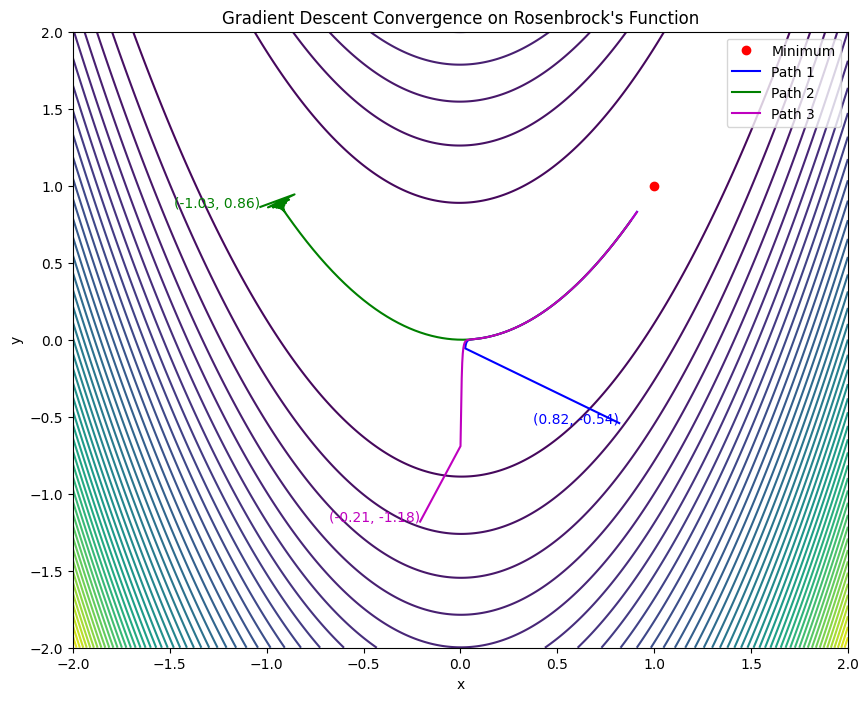

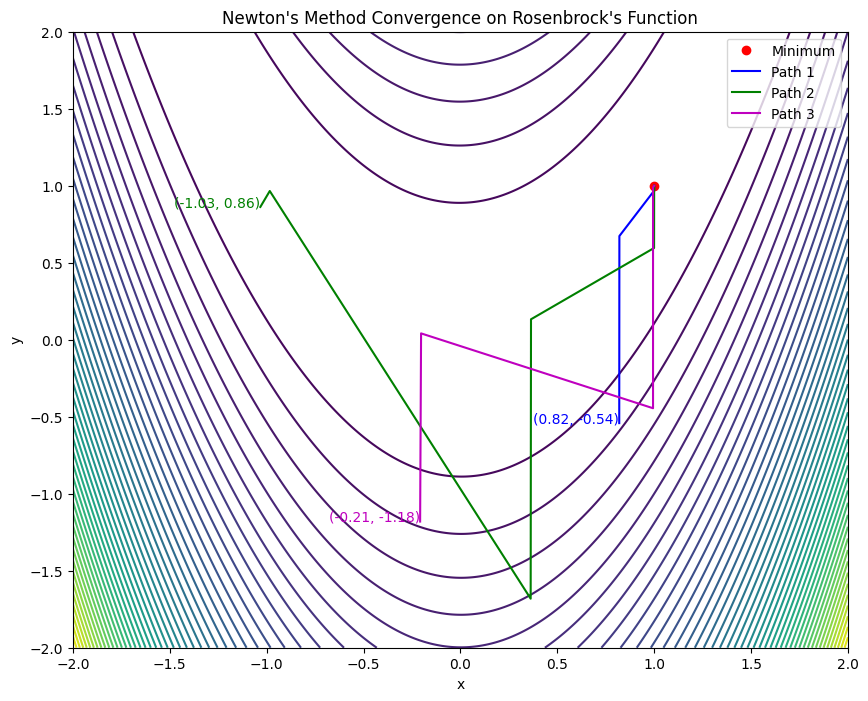

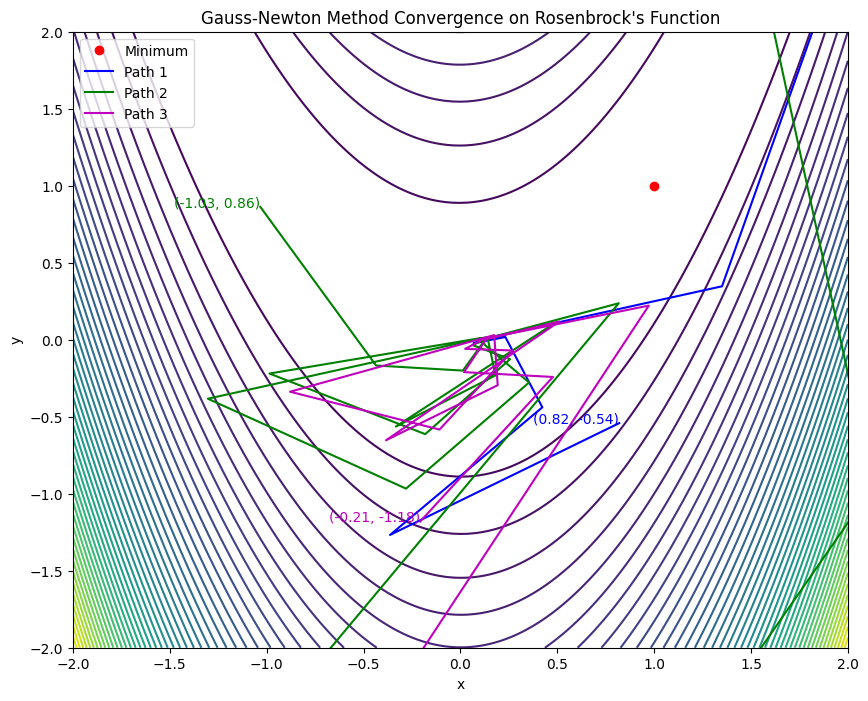

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm
def gradient_descent(start_point, learning_rate=0.002, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
    return np.array(path)

# Newton's Method
def newton_method(start_point, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        new_point = path[-1] - np.linalg.inv(H).dot(grad)
        path.append(new_point)
    return np.array(path)

# Gauss-Newton Method (adjusted with damping for stability)
def gauss_newton_method(start_point, damping_factor=1e-4, iterations=700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        # Compute approximate Jacobian (as in the original)
        J = np.array([[-400 * (path[-1][1] - path[-1][0]**2) - 2 * (1 - path[-1][0]), 
                       200 * (path[-1][1] - path[-1][0]**2)],
                      [-400 * path[-1][0], 200]])
        # Damped approximation to avoid inversion issues
        J_damped = J.T.dot(J) + damping_factor * np.eye(J.shape[1])
        new_point = path[-1] - np.linalg.inv(J_damped).dot(J.T.dot(grad))
        path.append(new_point)
    return np.array(path)


# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points):
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}")
        # Annotate starting points with coordinate values
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['b', 'g', 'm']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Plot grouped results
plot_grouped("Gradient Descent", gd_paths, colors, start_points)
plot_grouped("Newton's Method", newton_paths, colors, start_points)
plot_grouped("Gauss-Newton Method", gn_paths, colors, start_points)



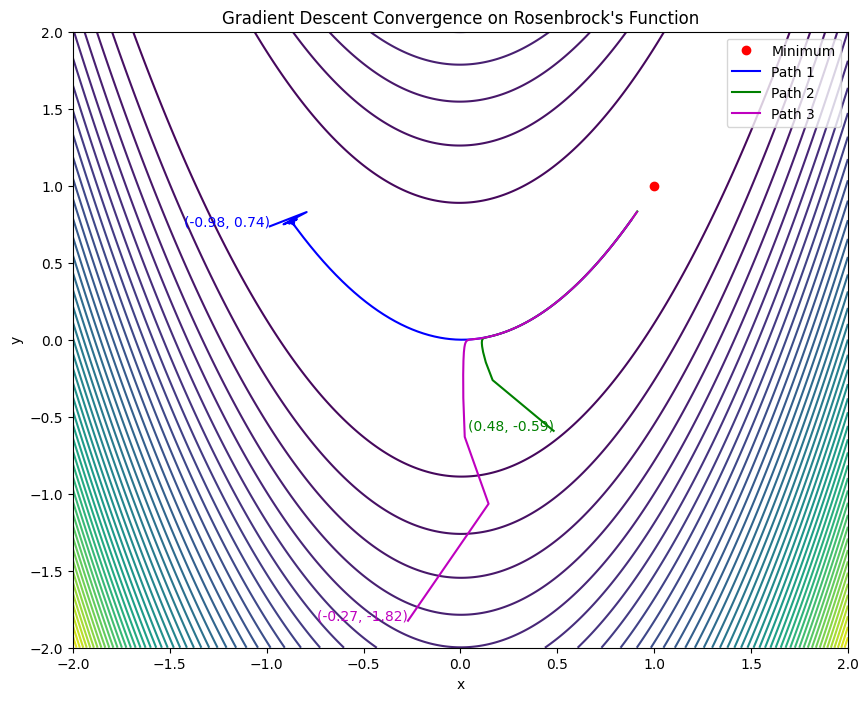

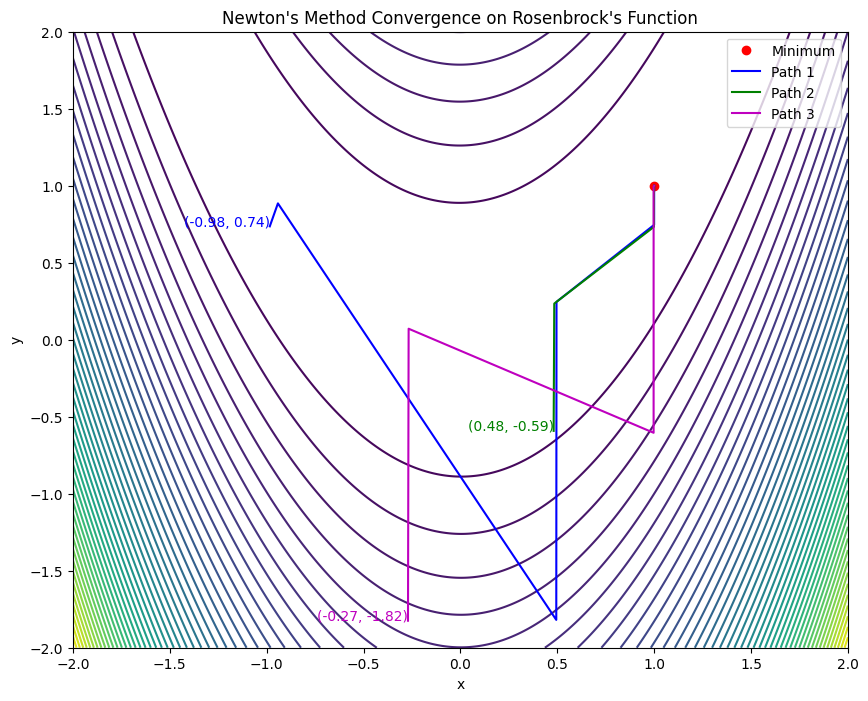

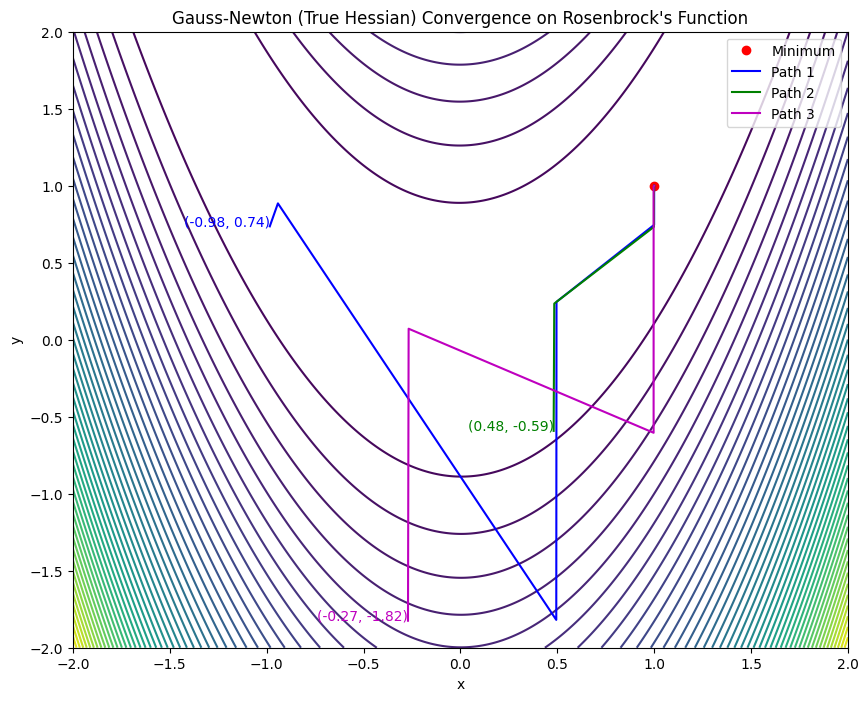

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm
def gradient_descent(start_point, learning_rate=0.002, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
    return np.array(path)

# Newton's Method
def newton_method(start_point, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        new_point = path[-1] - np.linalg.inv(H).dot(grad)
        path.append(new_point)
    return np.array(path)

# Gauss-Newton Method using the True Hessian (Becomes Newton's Method)
def gauss_newton_with_true_hessian(start_point, iterations=700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])  # Compute gradient
        H = hessian(*path[-1])      # Use true Hessian for curvature
        new_point = path[-1] - np.linalg.inv(H).dot(grad)  # Newton step
        path.append(new_point)
    return np.array(path)


# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points):
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}")
        # Annotate starting points with coordinate values
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['b', 'g', 'm']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_with_true_hessian(start_point) for start_point in start_points]

# Plot grouped results
plot_grouped("Gradient Descent", gd_paths, colors, start_points)
plot_grouped("Newton's Method", newton_paths, colors, start_points)
plot_grouped("Gauss-Newton (True Hessian)", gn_paths, colors, start_points)



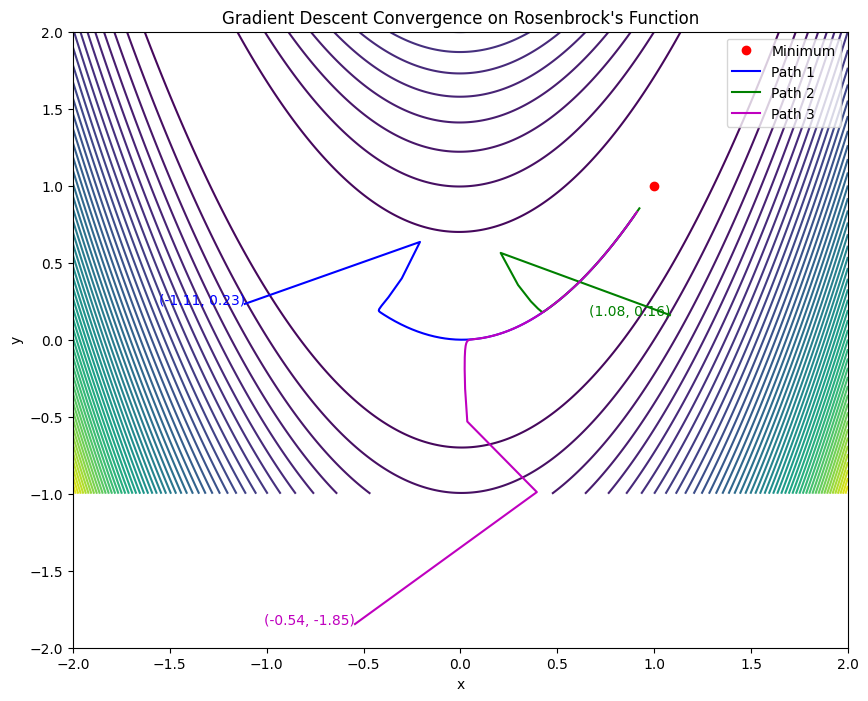

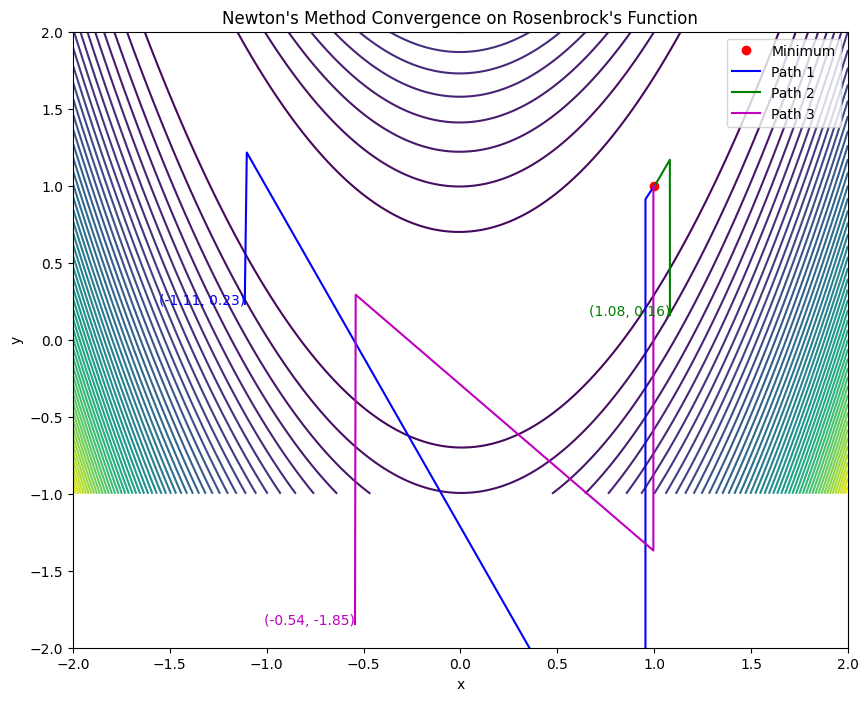

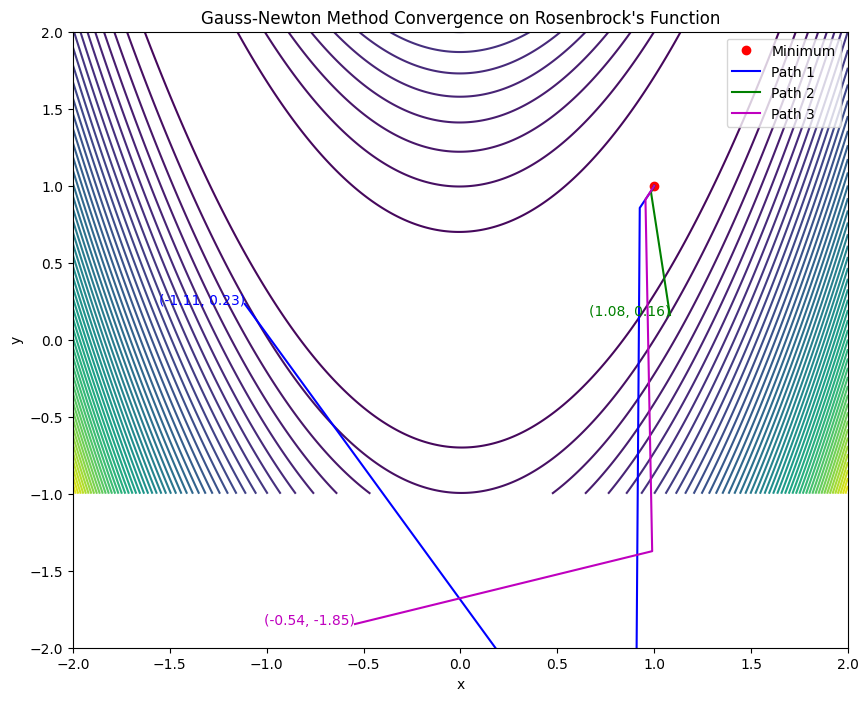

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
# Rosenbrock function
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

# Define the grid for the contour plot
x = np.linspace(-2, 2, 400)  # x-axis range
y = np.linspace(-1, 3, 400)  # y-axis range
X, Y = np.meshgrid(x, y)     # Create a meshgrid
Z = rosenbrock(X, Y)         # Evaluate the Rosenbrock function on the grid

# Continue with the rest of your code


def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm
def gradient_descent(start_point, learning_rate=0.002, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
    return np.array(path)

# Newton's Method
def newton_method(start_point, iterations=1700):
    path = [start_point]
    for _ in range(iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        new_point = path[-1] - np.linalg.inv(H).dot(grad)
        path.append(new_point)
    return np.array(path)

def gauss_newton_method(start_point, damping_factor=1e-2, iterations=700):
    path = [np.array(start_point)]
    for _ in range(iterations):
        x, y = path[-1]
        
        # Define residuals
        r1 = np.sqrt(100) * (y - x**2)
        r2 = 1 - x
        residuals = np.array([r1, r2])  # (2,)

        # Define Jacobian of residuals
        J = np.array([[-20 * x, 10], [-1, 0]])  # (2, 2)
        
        # Compute damped J.T @ J
        J_damped = J.T @ J + damping_factor * np.eye(2)  # (2, 2)
        
        # Update step
        try:
            delta = np.linalg.inv(J_damped) @ J.T @ residuals  # Ensure dimensions align
        except np.linalg.LinAlgError:
            break  # Exit if matrix inversion fails
        
        new_point = path[-1] - delta
        path.append(new_point)
        
        # Break if close to the minimum
        if np.linalg.norm(delta) < 1e-6:
            break
    
    return np.array(path)



# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points):
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}")
        # Annotate starting points with coordinate values
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['b', 'g', 'm']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Define the grid for the contour plot
x = np.linspace(-2, 2, 400)  # x-axis range
y = np.linspace(-1, 3, 400)  # y-axis range
X, Y = np.meshgrid(x, y)     # Create a meshgrid
Z = rosenbrock(X, Y)         # Evaluate the Rosenbrock function on the grid

# Plot grouped results
plot_grouped("Gradient Descent", gd_paths, colors, start_points)
plot_grouped("Newton's Method", newton_paths, colors, start_points)
plot_grouped("Gauss-Newton Method", gn_paths, colors, start_points)



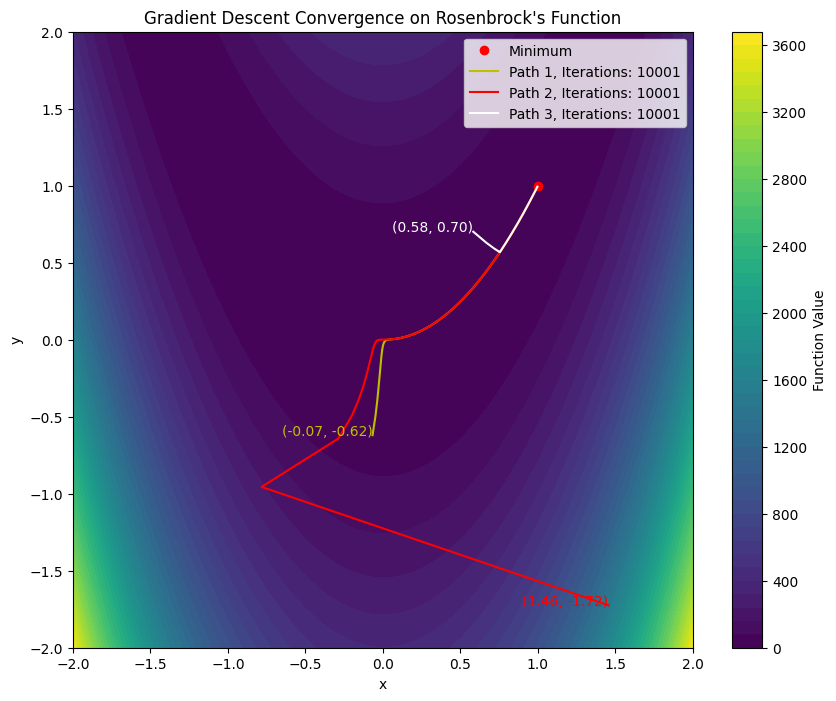

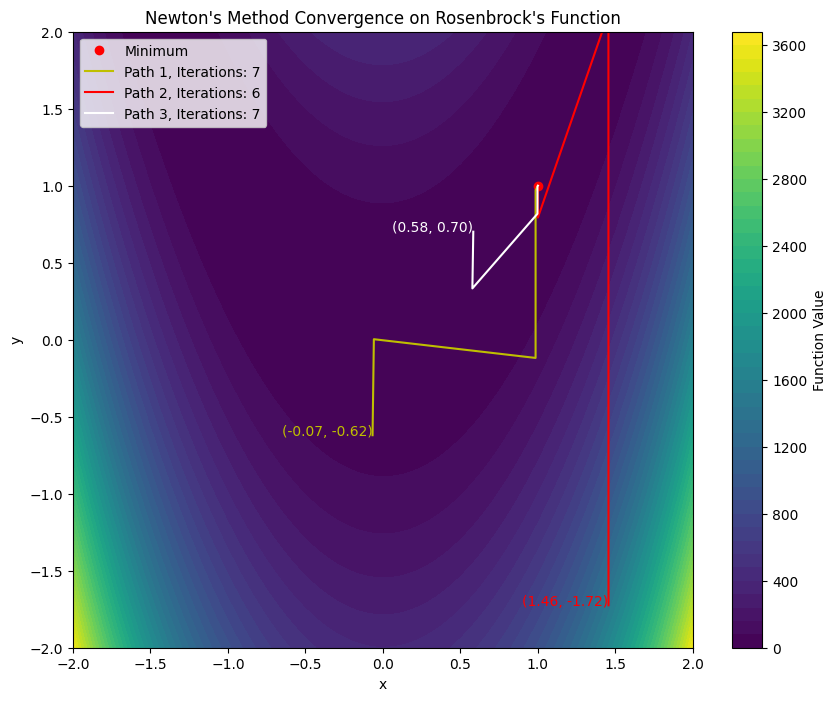

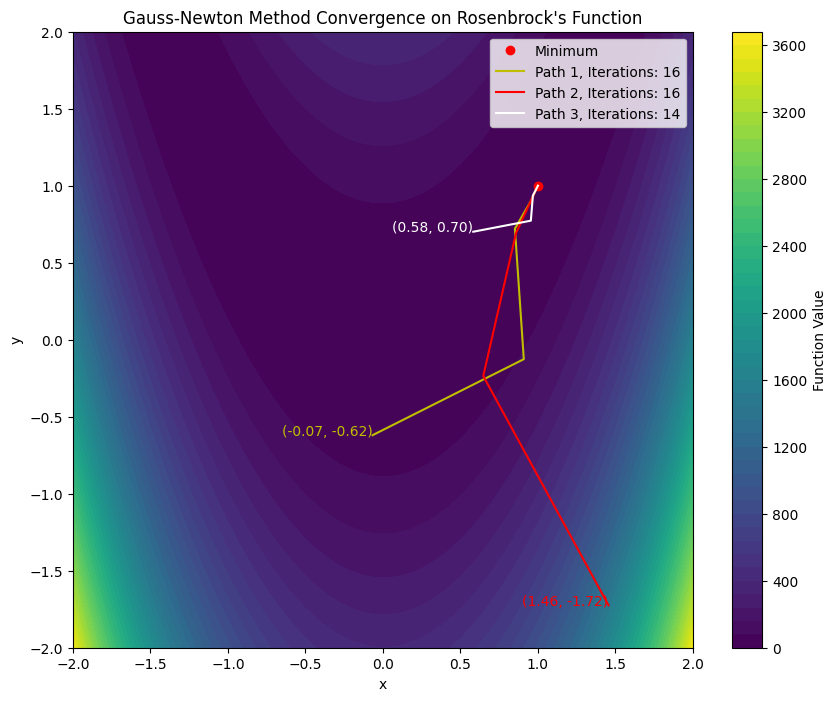

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

# Define the grid for the contour plot (expanded y-range to fix the bottom 1/3 issue)
x = np.linspace(-2, 2, 400)  # x-axis range
y = np.linspace(-2, 2, 400)  # y-axis range -2 to 2 for full domain coverage
X, Y = np.meshgrid(x, y)     # Create a meshgrid
Z = rosenbrock(X, Y)         # Evaluate the Rosenbrock function on the grid

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm with stopping condition
def gradient_descent(start_point, learning_rate=0.001, max_iterations=10000, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
        
        # Stop if the gradient is small enough (convergence)
        if np.linalg.norm(grad) < tolerance:
            break
    return np.array(path)

# Newton's Method with stopping condition
def newton_method(start_point, max_iterations=10000, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        try:
            new_point = path[-1] - np.linalg.inv(H).dot(grad)
        except np.linalg.LinAlgError:
            break  # Exit if Hessian is singular and cannot be inverted
        path.append(new_point)
        
        # Stop if the change in position is very small (convergence)
        if np.linalg.norm(new_point - path[-2]) < tolerance:
            break
    return np.array(path)

# Gauss-Newton Method with damping factor to ensure stability
def gauss_newton_method(start_point, damping_factor=1e-1, max_iterations=10000, tolerance=1e-6):
    path = [np.array(start_point)]
    for _ in range(max_iterations):
        x, y = path[-1]
        
        # Define residuals
        r1 = np.sqrt(100) * (y - x**2)
        r2 = 1 - x
        residuals = np.array([r1, r2])  # (2,)
        
        # Define Jacobian of residuals
        J = np.array([[-20 * x, 10], [-1, 0]])  # (2, 2)
        
        # Compute damped J.T @ J
        J_damped = J.T @ J + damping_factor * np.eye(2)  # (2, 2)
        
        # Update step
        try:
            delta = np.linalg.inv(J_damped) @ J.T @ residuals  # Ensure dimensions align
        except np.linalg.LinAlgError:
            break  # Exit if matrix inversion fails
        
        new_point = path[-1] - delta
        path.append(new_point)
        
        # Break if close to the minimum
        if np.linalg.norm(delta) < tolerance:
            break
    
    return np.array(path)

# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points, iterations_list):
    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}, Iterations: {iterations_list[i]}")
        # Annotate starting points with coordinate values
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['y', 'r', 'w']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Calculate the number of iterations for each path
gd_iterations = [len(path) for path in gd_paths]
newton_iterations = [len(path) for path in newton_paths]
gn_iterations = [len(path) for path in gn_paths]

# Plot grouped results with the number of iterations
plot_grouped("Gradient Descent", gd_paths, colors, start_points, gd_iterations)
plot_grouped("Newton's Method", newton_paths, colors, start_points, newton_iterations)
plot_grouped("Gauss-Newton Method", gn_paths, colors, start_points, gn_iterations)


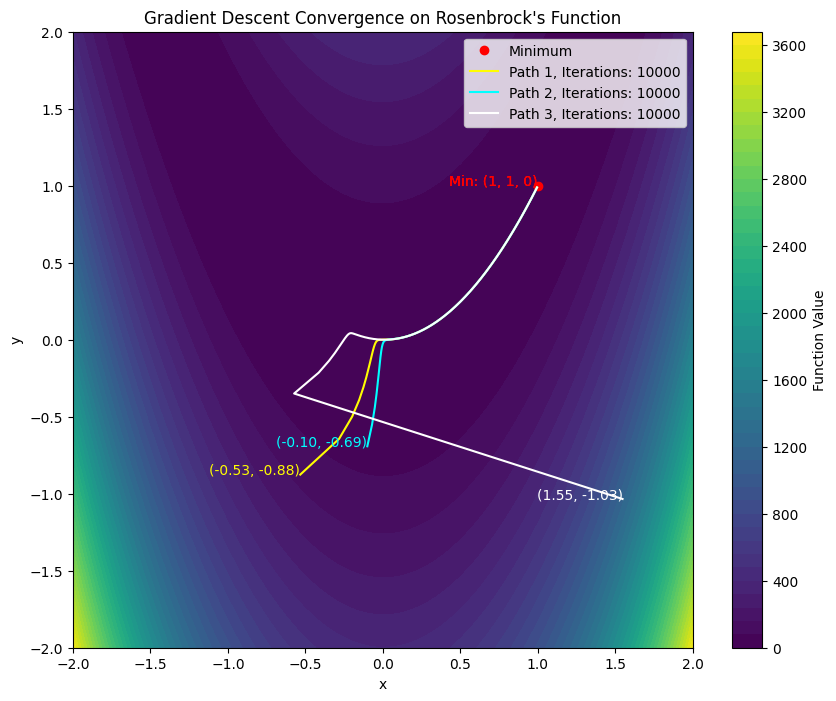

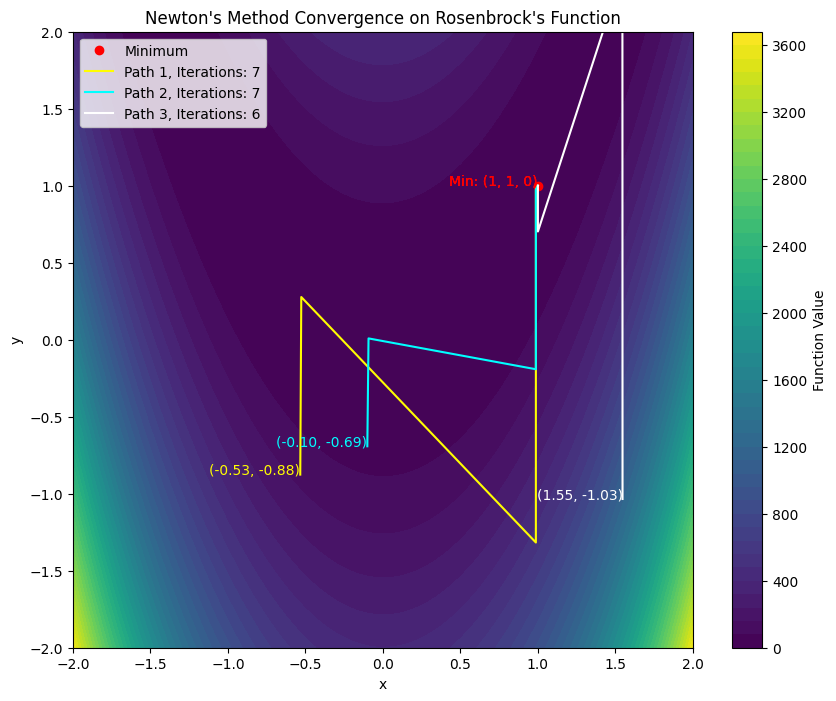

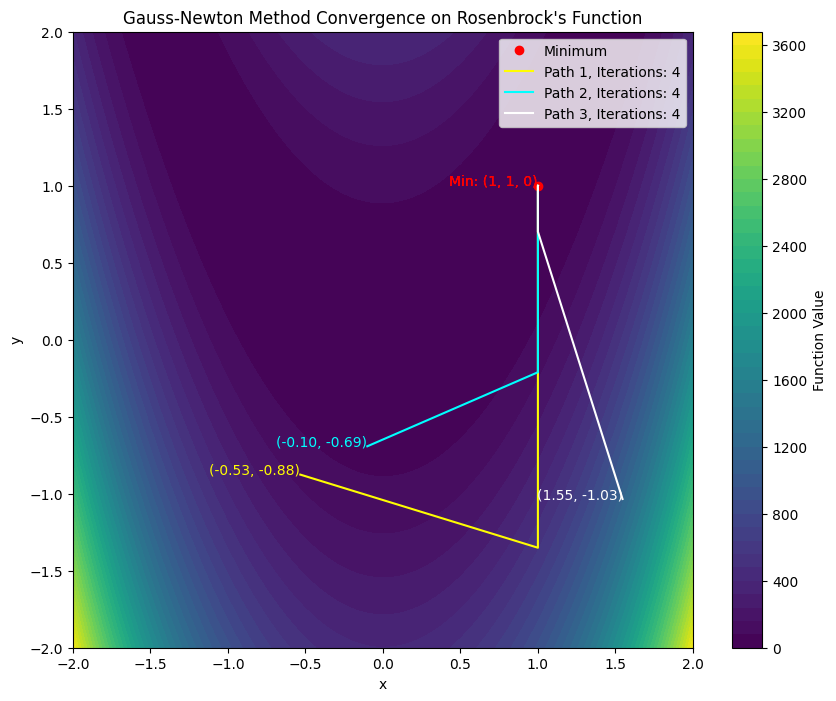

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm with stopping condition
def gradient_descent(start_point, learning_rate=0.001, max_iterations=9999, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
        
        # Stop if the gradient is small enough (convergence)
        if np.linalg.norm(grad) < tolerance:
            break
    return np.array(path)

# Newton's Method with stopping condition
def newton_method(start_point, max_iterations=10000, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        try:
            new_point = path[-1] - np.linalg.inv(H).dot(grad)
        except np.linalg.LinAlgError:
            break  # Exit if Hessian is singular and cannot be inverted
        path.append(new_point)
        
        # Stop if the change in position is very small (convergence)
        if np.linalg.norm(new_point - path[-2]) < tolerance:
            break
    return np.array(path)

# Gauss-Newton Method with damping factor for faster convergence
def gauss_newton_method(start_point, damping_factor=1e-9, max_iterations=9999, tolerance=1e-1):
    path = [np.array(start_point)]
    for _ in range(max_iterations):
        x, y = path[-1]
        
        # Define residuals for the Rosenbrock function
        r1 = 10 * (y - x**2)
        r2 = 1 - x
        residuals = np.array([r1, r2])  # (2,)
        
        # Define Jacobian of residuals
        J = np.array([[-20 * x, 10], [-1, 0]])  # (2, 2)
        
        # Compute damped J.T @ J to avoid instability
        J_damped = J.T @ J + damping_factor * np.eye(2)  # Add damping factor for stability
        
        # Update step with the damped version
        try:
            delta = np.linalg.inv(J_damped) @ J.T @ residuals  # Solve for step size
        except np.linalg.LinAlgError:
            break  # Exit if matrix inversion fails
        
        # Update position based on the step
        new_point = path[-1] - delta
        path.append(new_point)
        
        # Break if the update is small (convergence)
        if np.linalg.norm(delta) < tolerance:
            break
    
    return np.array(path)

# Create a grid for the contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points, iterations_list):
    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}, Iterations: {iterations_list[i]}")
        # Annotate starting points with coordinate values
        plt.text(1, 1, f"Min: (1, 1, 0)", color='red', fontsize=10, ha='right')
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['xkcd:bright yellow', 'xkcd:cyan', 'xkcd:white']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Calculate the number of iterations for each path
gd_iterations = [len(path) for path in gd_paths]
newton_iterations = [len(path) for path in newton_paths]
gn_iterations = [len(path) for path in gn_paths]

# Plot grouped results with the number of iterations
plot_grouped("Gradient Descent", gd_paths, colors, start_points, gd_iterations)
plot_grouped("Newton's Method", newton_paths, colors, start_points, newton_iterations)
plot_grouped("Gauss-Newton Method", gn_paths, colors, start_points, gn_iterations)
